# Mastercamp Data Science Project

## Préparation des données

Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

In [3]:
df = pd.read_csv('assets/valeursfoncieres-2022.txt', sep='|', low_memory=True, dtype=str)

In [4]:
df.head()

,Identifiant de document,Reference document,1 Articles CGI,2 Articles CGI,3 Articles CGI,4 Articles CGI,5 Articles CGI,No disposition,Date mutation,Nature mutation,...,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Identifiant local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,000001,03/01/2022,Vente,...,NaN,1,2,Appartement,NaN,24,1,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,000001,03/01/2022,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,S,NaN,84
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,000001,03/01/2022,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,S,NaN,88
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,000001,03/01/2022,Vente,...,NaN,1,2,Appartement,NaN,140,3,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,000001,04/01/2022,Vente,...,NaN,0,NaN,NaN,NaN,NaN,NaN,T,NaN,510


In [5]:
print('Shape: ', df.shape)
print('Columns: ', df.columns)

Shape:  (3803885, 43)
Columns:  Index(['Identifiant de document', 'Reference document', '1 Articles CGI',
       '2 Articles CGI', '3 Articles CGI', '4 Articles CGI', '5 Articles CGI',
       'No disposition', 'Date mutation', 'Nature mutation', 'Valeur fonciere',
       'No voie', 'B/T/Q', 'Type de voie', 'Code voie', 'Voie', 'Code postal',
       'Commune', 'Code departement', 'Code commune', 'Prefixe de section',
       'Section', 'No plan', 'No Volume', '1er lot',
       'Surface Carrez du 1er lot', '2eme lot', 'Surface Carrez du 2eme lot',
       '3eme lot', 'Surface Carrez du 3eme lot', '4eme lot',
       'Surface Carrez du 4eme lot', '5eme lot', 'Surface Carrez du 5eme lot',
       'Nombre de lots', 'Code type local', 'Type local', 'Identifiant local',
       'Surface reelle bati', 'Nombre pieces principales', 'Nature culture',
       'Nature culture speciale', 'Surface terrain'],
      dtype='object')


On voit très vite que la target variable est "valeur fonciere"

On détermine les colonnes avec seulement des valeurs nulles et on les supprime

In [6]:
to_drop = df.columns[df.isnull().all()]
print('Columns with only NaN: ', to_drop)

Columns with only NaN:  Index(['Identifiant de document', 'Reference document', '1 Articles CGI',
       '2 Articles CGI', '3 Articles CGI', '4 Articles CGI', '5 Articles CGI',
       'Identifiant local'],
      dtype='object')


In [7]:
df.drop(to_drop, axis=1, inplace=True)
df.head()

,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,B/T/Q,Type de voie,Code voie,Voie,Code postal,...,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain
0,000001,03/01/2022,Vente,"55000,00",13,NaN,RUE,2280,DE LA LIBERTE,1000,...,NaN,NaN,1,2,Appartement,24,1,NaN,NaN,NaN
1,000001,03/01/2022,Vente,"143000,00",NaN,NaN,NaN,B010,CHAMP COCHET,1480,...,NaN,NaN,0,NaN,NaN,NaN,NaN,S,NaN,84
2,000001,03/01/2022,Vente,"143000,00",NaN,NaN,NaN,B010,CHAMP COCHET,1480,...,NaN,NaN,0,NaN,NaN,NaN,NaN,S,NaN,88
3,000001,03/01/2022,Vente,"143000,00",98,NaN,RTE,0055,DE LA DOMBES,1480,...,NaN,NaN,1,2,Appartement,140,3,NaN,NaN,NaN
4,000001,04/01/2022,Vente,"300,00",NaN,NaN,NaN,B031,AUX PIERRES,1480,...,NaN,NaN,0,NaN,NaN,NaN,NaN,T,NaN,510


In [8]:
print('Number of rows with at least one missing value: ', df.isnull().any(axis=1).sum())

Number of rows with at least one missing value:  3803885


Toutes les lignes ont au moins une valeur nulle. Il va falloir faire un choix dans les colonnes à garder

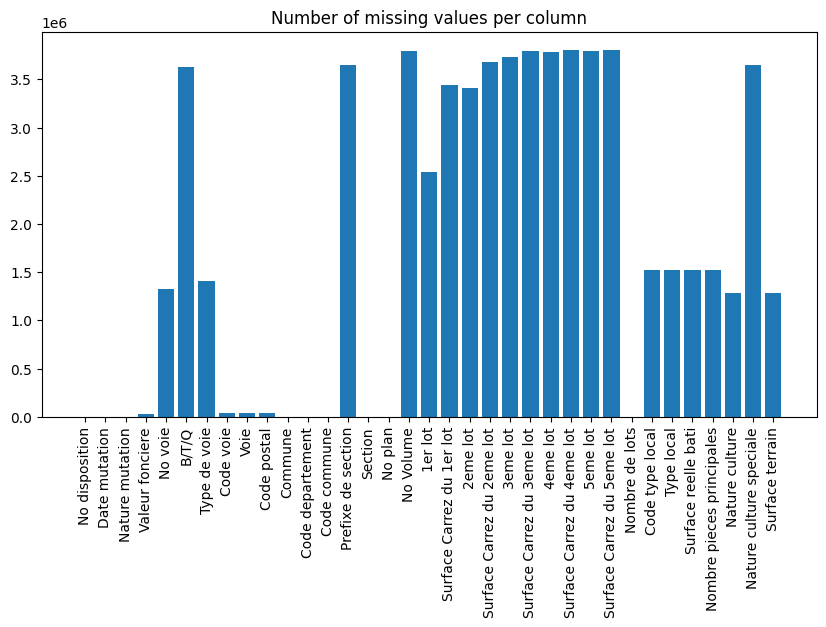

In [9]:
plt.figure(figsize=(10, 5))
plt.bar(df.isnull().sum().index, df.isnull().sum().values)
plt.xticks(rotation=90)
plt.title('Number of missing values per column')
plt.show()

In [10]:
print('Number of rows with at least one value for "Surface Carrez du 1er lot", "Surface Carrez du 2eme lot", "Surface Carrez du 3eme lot" or "Surface Carrez du 4eme lot" or "Surface Carrez du 5eme lot": ', df[['Surface Carrez du 1er lot', 'Surface Carrez du 2eme lot', 'Surface Carrez du 3eme lot', 'Surface Carrez du 4eme lot', 'Surface Carrez du 5eme lot']].notnull().any(axis=1).sum())

Number of rows with at least one value for "Surface Carrez du 1er lot", "Surface Carrez du 2eme lot", "Surface Carrez du 3eme lot" or "Surface Carrez du 4eme lot" or "Surface Carrez du 5eme lot":  499290


In [11]:
df.drop(['No voie', 'B/T/Q', 'Prefixe de section', 'No Volume', 'Code type local'], axis=1, inplace=True)

# remove the rows which don't have a value for either 'Surface Carrez du 1er lot', 'Surface Carrez du 2eme lot', 'Surface Carrez du 3eme lot', 'Surface Carrez du 4eme lot' or 'Surface Carrez du 5eme lot'
df.dropna(subset=['Surface Carrez du 1er lot', 'Surface Carrez du 2eme lot', 'Surface Carrez du 3eme lot', 'Surface Carrez du 4eme lot', 'Surface Carrez du 5eme lot'], how='all', inplace=True)

In [12]:
df['Valeur fonciere'] = df['Valeur fonciere'].str.replace(',', '.').astype(float)

In [13]:
df['Surface Carrez du 1er lot'] = df['Surface Carrez du 1er lot'].str.replace(',', '.').astype(float).fillna(0)
df['Surface Carrez du 2eme lot'] = df['Surface Carrez du 2eme lot'].str.replace(',', '.').astype(float).fillna(0)
df['Surface Carrez du 3eme lot'] = df['Surface Carrez du 3eme lot'].str.replace(',', '.').astype(float).fillna(0)
df['Surface Carrez du 4eme lot'] = df['Surface Carrez du 4eme lot'].str.replace(',', '.').astype(float).fillna(0)
df['Surface Carrez du 5eme lot'] = df['Surface Carrez du 5eme lot'].str.replace(',', '.').astype(float).fillna(0)

In [14]:
# create a new column with the total surface
df['Surface Carrez totale'] = df['Surface Carrez du 1er lot'] + df['Surface Carrez du 2eme lot'] + df['Surface Carrez du 3eme lot'] + df['Surface Carrez du 4eme lot'] + df['Surface Carrez du 5eme lot']

In [15]:
df.drop(df[df['Surface Carrez totale'] == 0].index, inplace=True)

In [16]:
df.head()

,No disposition,Date mutation,Nature mutation,Valeur fonciere,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,...,5eme lot,Surface Carrez du 5eme lot,Nombre de lots,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Nature culture speciale,Surface terrain,Surface Carrez totale
0,000001,03/01/2022,Vente,55000.0,RUE,2280,DE LA LIBERTE,1000,BOURG-EN-BRESSE,01,...,NaN,0.0,1,Appartement,24,1,NaN,NaN,NaN,24.10
3,000001,03/01/2022,Vente,143000.0,RTE,0055,DE LA DOMBES,1480,SAVIGNEUX,01,...,NaN,0.0,1,Appartement,140,3,NaN,NaN,NaN,123.23
11,000001,05/01/2022,Vente,64000.0,BD,0620,DE BROU,1000,BOURG-EN-BRESSE,01,...,NaN,0.0,1,Appartement,117,2,NaN,NaN,NaN,39.05
12,000001,05/01/2022,Vente,64000.0,BD,0620,DE BROU,1000,BOURG-EN-BRESSE,01,...,NaN,0.0,1,Dépendance,0,0,NaN,NaN,NaN,39.05
17,000001,04/01/2022,Vente,134000.0,RUE,1070,DE CUIRON,1000,BOURG-EN-BRESSE,01,...,NaN,0.0,1,Dépendance,0,0,NaN,NaN,NaN,70.02


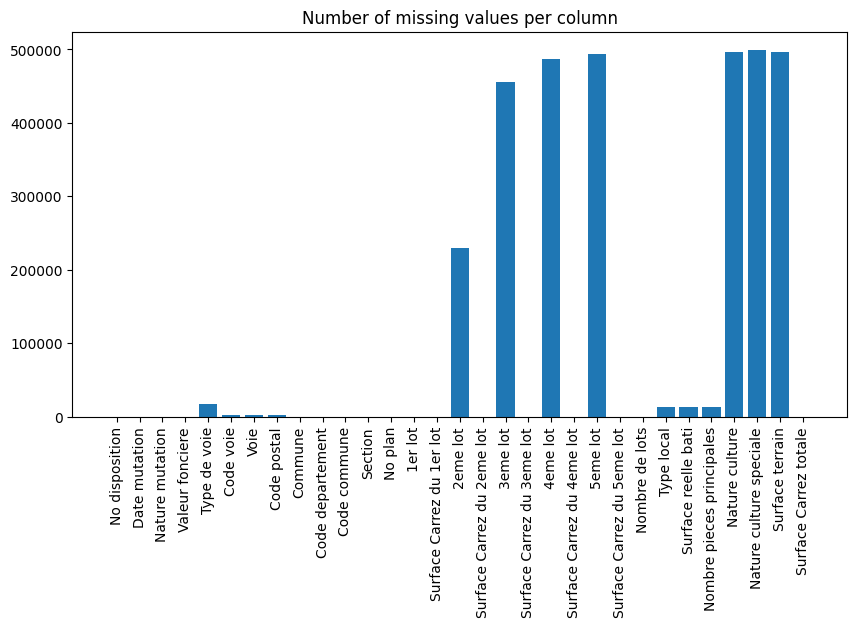

In [17]:
plt.figure(figsize=(10, 5))
plt.bar(df.isnull().sum().index, df.isnull().sum().values)
plt.xticks(rotation=90)
plt.title('Number of missing values per column')
plt.show()

In [18]:
df.drop(['1er lot', '2eme lot', '3eme lot', '4eme lot', '5eme lot', 'Nature culture', 'Nature culture speciale', 'Surface terrain'], axis=1, inplace=True)

In [19]:
df.dropna(inplace=True)

In [20]:
df.drop(['No disposition', 'Date mutation', 'Commune', 'Code voie', 'Section', 'No plan'], axis=1, inplace=True)

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from scipy.stats import spearmanr

le = LabelEncoder()
df['Nature mutation'] = le.fit_transform(df['Nature mutation'])
df['Type de voie'] = le.fit_transform(df['Type de voie'])
df['Voie'] = le.fit_transform(df['Voie'])
df['Code postal'] = le.fit_transform(df['Code postal'])
df['Code departement'] = le.fit_transform(df['Code departement'])
df['Code commune'] = le.fit_transform(df['Code commune'])
df['Type local'] = le.fit_transform(df['Type local'])


X = df.drop(['Valeur fonciere'], axis=1)
y = df['Valeur fonciere']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = LinearRegression()
model.fit(X_train, y_train)

print('Score: ', model.score(X_test, y_test))


Score:  0.6883120751403122


In [77]:
print('Spearmanr score', spearmanr(model.predict(X_test), y_test))

Spearmanr score SignificanceResult(statistic=0.44560956874858487, pvalue=0.0)


In [79]:
# random forest
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=25, verbose=2)
model.fit(X_train, y_train)

print('Score: ', model.score(X_test, y_test))
print('Spearmanr score', spearmanr(model.predict(X_test), y_test))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 25


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.0s remaining:    0.0s


building tree 2 of 25
building tree 3 of 25
building tree 4 of 25
building tree 5 of 25
building tree 6 of 25
building tree 7 of 25
building tree 8 of 25
building tree 9 of 25
building tree 10 of 25
building tree 11 of 25
building tree 12 of 25
building tree 13 of 25
building tree 14 of 25
building tree 15 of 25
building tree 16 of 25
building tree 17 of 25
building tree 18 of 25
building tree 19 of 25
building tree 20 of 25
building tree 21 of 25
building tree 22 of 25
building tree 23 of 25
building tree 24 of 25
building tree 25 of 25


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  3.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    3.4s finished


Score:  0.9315194631744877


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


Spearmanr score SignificanceResult(statistic=0.8956028806452455, pvalue=0.0)


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    3.3s finished


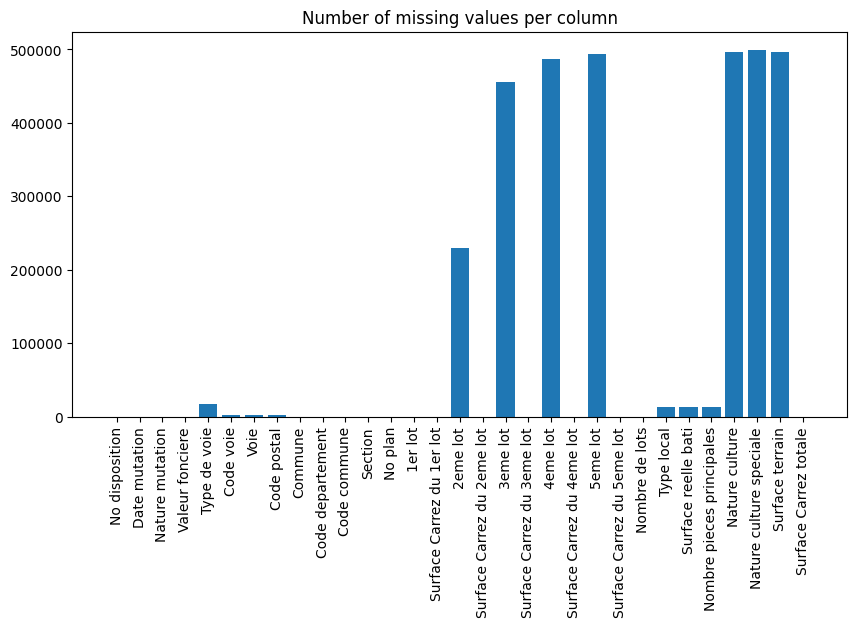

In [19]:
plt.figure(figsize=(10, 5))
plt.bar(df.isnull().sum().index, df.isnull().sum().values)
plt.xticks(rotation=90)
plt.title('Number of missing values per column')
plt.show()

On garde seulement les colonnes avec moins de 2 millions de données nulles. Il est impossible pour nous de déterminer la surface selon la loi Carrez avec les informations que l'on a. Il est plus pertinent d'utiliser les surfaces réelle batie et surface terrain

In [50]:
to_drop = df.columns[df.isnull().sum() > 2000000]
print('Columns with more than 2 million missing values: ', to_drop)

df.drop(to_drop, axis=1, inplace=True)
print('Shape: ', df.shape)
print('Columns: ', df.columns)  

Columns with more than 2 million missing values:  Index(['B/T/Q', 'Prefixe de section', 'No Volume', '1er lot',
       'Surface Carrez du 1er lot', '2eme lot', 'Surface Carrez du 2eme lot',
       '3eme lot', 'Surface Carrez du 3eme lot', '4eme lot',
       'Surface Carrez du 4eme lot', '5eme lot', 'Surface Carrez du 5eme lot',
       'Nature culture speciale'],
      dtype='object')
Shape:  (3803885, 21)
Columns:  Index(['No disposition', 'Date mutation', 'Nature mutation', 'Valeur fonciere',
       'No voie', 'Type de voie', 'Code voie', 'Voie', 'Code postal',
       'Commune', 'Code departement', 'Code commune', 'Section', 'No plan',
       'Nombre de lots', 'Code type local', 'Type local',
       'Surface reelle bati', 'Nombre pieces principales', 'Nature culture',
       'Surface terrain'],
      dtype='object')


La surface risque d'être la colonne la plus importante. On va analyser les 2 colonnes de surface "Surface réelle bati" et "Surface terrain"

In [51]:
no_srb = df[df['Surface reelle bati'].isnull()].shape[0]

In [52]:
no_st = df[df['Surface terrain'].isnull()].shape[0]

In [53]:
srb_and_st = df[(df['Surface reelle bati'].astype(float) > 0) & (df['Surface terrain'].astype(float) > 0)].shape[0]

In [54]:
no_srb_and_st = df[(df['Surface reelle bati'].isnull()) & (df['Surface terrain'].isnull())].shape[0]

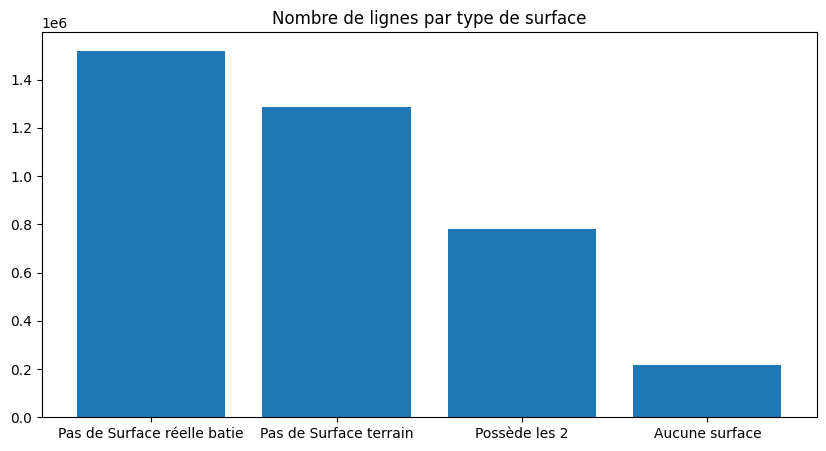

In [55]:
plt.figure(figsize=(10, 5))
plt.bar(['Pas de Surface réelle batie', 'Pas de Surface terrain', 'Possède les 2', 'Aucune surface'], [no_srb, no_st, srb_and_st, no_srb_and_st])
plt.title('Nombre de lignes par type de surface')
plt.show()


On regarde les types de terrains/locaux

In [56]:
print('Type local: ', df['Type local'].unique())
print('Nature culture: ', df['Nature culture'].unique())

Type local:  ['Appartement' nan 'Maison' 'Local industriel. commercial ou assimilé'
 'Dépendance']
Nature culture:  [nan 'S' 'T' 'AB' 'AG' 'P' 'VI' 'L' 'J' 'BS' 'BT' 'BR' 'BP' 'PA' 'BM' 'CH'
 'E' 'BF' 'VE' 'B' 'CA' 'PP' 'PC' 'BO' 'TP' 'LB' 'PH' 'PE']


On traduit les acronymes dans Nature culture pour y voir plus clair

In [57]:
mapping = {
    'T': 'Terres',
    'TE': 'Terres plantées',
    'P': 'Prés',
    'PA': 'Pâturages',
    'PC': 'Pacages',
    'PE': 'Pré d\'embouchure',
    'PH': 'Herbages',
    'PP': 'Pré plantes',
    'VE': 'Vergers',
    'VI': 'Vignes',
    'B': 'Bois',
    'BF': 'Futaies feuillues',
    'BM': 'Futaies mixtes',
    'BO': 'Oseraies',
    'BP': 'Peupleraies',
    'BR': 'Futaies résineuses',
    'BS': 'Taillis sous futaie',
    'BT': 'Taillis simples',
    'L': 'Landes',
    'LB': 'Landes boisées',
    'CA': 'Carrières',
    'E': 'Eaux',
    'J': 'Jardins',
    'AB': 'Terrains à bâtir',
    'AG': 'Terrains d\'agréments',
    'CH': 'Chemin de fer',
    'S': 'Sols'
}

df['Nature culture'] = df['Nature culture'].map(mapping)
df.head()

,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,Type de voie,Code voie,Voie,Code postal,Commune,...,Code commune,Section,No plan,Nombre de lots,Code type local,Type local,Surface reelle bati,Nombre pieces principales,Nature culture,Surface terrain
0,000001,03/01/2022,Vente,"55000,00",13,RUE,2280,DE LA LIBERTE,1000,BOURG-EN-BRESSE,...,53,AM,102,1,2,Appartement,24,1,NaN,NaN
1,000001,03/01/2022,Vente,"143000,00",NaN,NaN,B010,CHAMP COCHET,1480,SAVIGNEUX,...,398,ZE,184,0,NaN,NaN,NaN,NaN,Sols,84
2,000001,03/01/2022,Vente,"143000,00",NaN,NaN,B010,CHAMP COCHET,1480,SAVIGNEUX,...,398,ZE,185,0,NaN,NaN,NaN,NaN,Sols,88
3,000001,03/01/2022,Vente,"143000,00",98,RTE,0055,DE LA DOMBES,1480,SAVIGNEUX,...,398,ZE,187,1,2,Appartement,140,3,NaN,NaN
4,000001,04/01/2022,Vente,"300,00",NaN,NaN,B031,AUX PIERRES,1480,MESSIMY SUR SAONE,...,243,A,643,0,NaN,NaN,NaN,NaN,Terres,510


On merge les colonnes de type immobilier ensemble

In [58]:
df['Type immobilier'] = df['Nature culture'].fillna('') + df['Type local'].fillna('')
df.drop(['Nature culture', 'Type local'], axis=1, inplace=True)

On remplie les valeurs nulles en surface par 0

In [59]:
df['Surface reelle bati'].fillna(0, inplace=True)
df['Surface terrain'].fillna(0, inplace=True)

In [60]:
df.shape

(3803885, 20)

On s'occupe maintenant des valeurs nulles restantes

In [61]:
df.head()

,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Section,No plan,Nombre de lots,Code type local,Surface reelle bati,Nombre pieces principales,Surface terrain,Type immobilier
0,000001,03/01/2022,Vente,"55000,00",13,RUE,2280,DE LA LIBERTE,1000,BOURG-EN-BRESSE,01,53,AM,102,1,2,24,1,0,Appartement
1,000001,03/01/2022,Vente,"143000,00",NaN,NaN,B010,CHAMP COCHET,1480,SAVIGNEUX,01,398,ZE,184,0,NaN,0,NaN,84,Sols
2,000001,03/01/2022,Vente,"143000,00",NaN,NaN,B010,CHAMP COCHET,1480,SAVIGNEUX,01,398,ZE,185,0,NaN,0,NaN,88,Sols
3,000001,03/01/2022,Vente,"143000,00",98,RTE,0055,DE LA DOMBES,1480,SAVIGNEUX,01,398,ZE,187,1,2,140,3,0,Appartement
4,000001,04/01/2022,Vente,"300,00",NaN,NaN,B031,AUX PIERRES,1480,MESSIMY SUR SAONE,01,243,A,643,0,NaN,0,NaN,510,Terres


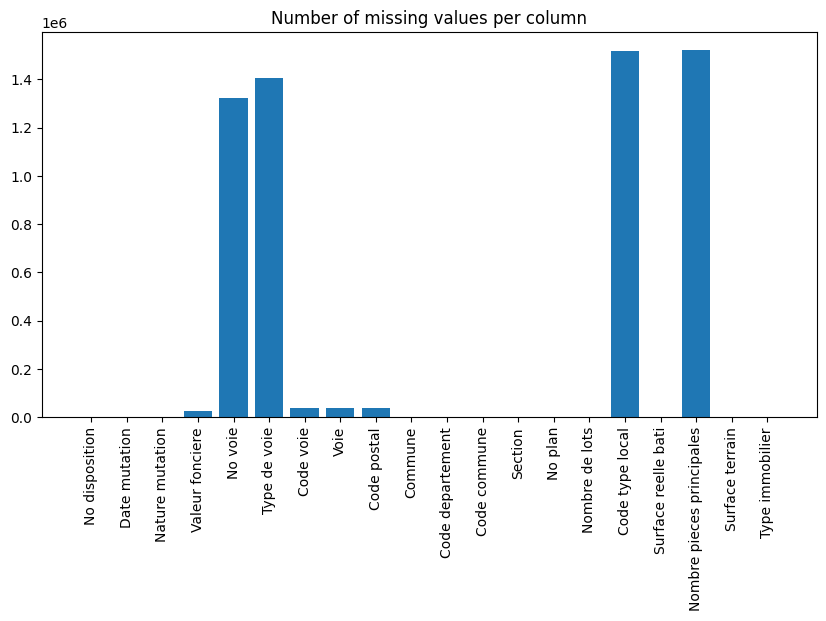

In [62]:
plt.figure(figsize=(10, 5))
plt.bar(df.isnull().sum().index, df.isnull().sum().values)
plt.xticks(rotation=90)
plt.title('Number of missing values per column')
plt.show()

Nous pouvons remplir "No voie" et "Type de voie" par des 0 et '' car certaines adresses n'ont pas de voie. Pour les lots et les pièces principales, les terrains n'en ont pas forcément alors nous pouvons y mettre 0 (le modèle généralisera tout seul avec les types immobiliers)

Le "Code type local" est inutile, nous avons déjà les informations avec "Type immobilier". Nous labeliserons cette dernière de toute manière.

En ce qui concerne les dernières valeurs nulles, elles sont infimes et nous pouvons les drop.

In [63]:
df['No voie'] = df['No voie'].fillna(0).astype(int)
df['Nombre de lots'] = df['Nombre de lots'].fillna(0).astype(int)
df['Nombre pieces principales'] = df['Nombre pieces principales'].fillna(0).astype(int)
df['Type de voie'] = df['Type de voie'].fillna('')
df.drop(['Code type local'], axis=1, inplace=True)
df.dropna(inplace=True)

In [64]:
print('Number of missing values: ', df.isnull().sum().sum())

Number of missing values:  0


In [65]:
df.shape

(3739782, 19)

On met la valeur foncière en target

In [66]:
df['Valeur fonciere'] = df['Valeur fonciere'].str.replace(',', '.').astype(float)

## Graphiques et analyses

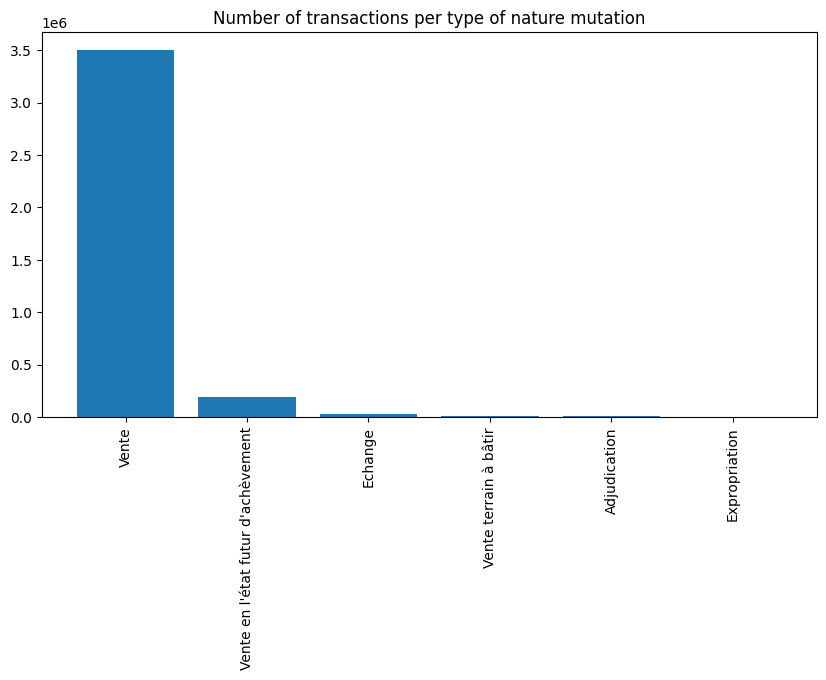

In [67]:
df['Nature mutation'] = df['Nature mutation'].astype(str)

plt.figure(figsize=(10, 5))
plt.bar(df['Nature mutation'].value_counts().index, df['Nature mutation'].value_counts().values)
plt.xticks(rotation=90)
plt.title('Number of transactions per type of nature mutation')
plt.show()

Mean:  674846.0328216323
Standard deviation:  5498679.465799136
Minimum:  0.01
Maximum:  1003401470.0
90th percentile:  619010.0
10th percentile:  15000.0


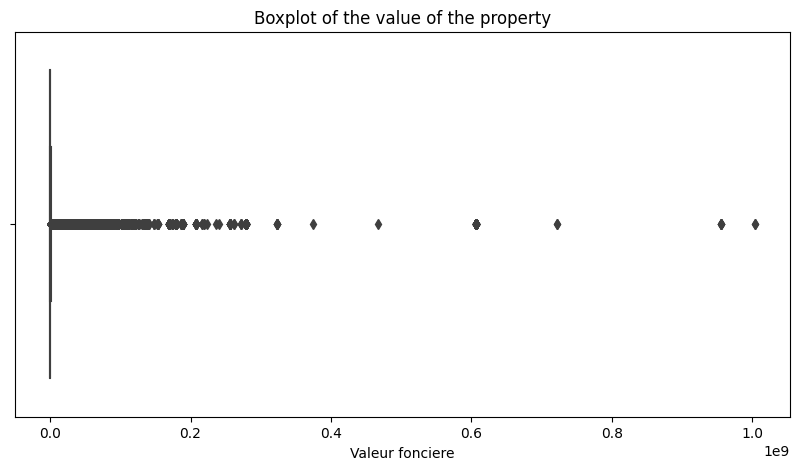

In [68]:
print('Mean: ', df['Valeur fonciere'].mean())
print('Standard deviation: ', df['Valeur fonciere'].std())
print('Minimum: ', df['Valeur fonciere'].min())
print('Maximum: ', df['Valeur fonciere'].max())
print('90th percentile: ', df['Valeur fonciere'].quantile(0.90))
print('10th percentile: ', df['Valeur fonciere'].quantile(0.10))

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Valeur fonciere'])
plt.title('Boxplot of the value of the property')
plt.show()

On s'occupe des "outliers". Certaines propriétés sont des exceptions et leur prix n'est pas déterminé par les informations qu'on a mais par leur excentricité.

In [69]:
df = df[(df['Valeur fonciere'] < df['Valeur fonciere'].quantile(0.90)) & (df['Valeur fonciere'] > df['Valeur fonciere'].quantile(0.10))]

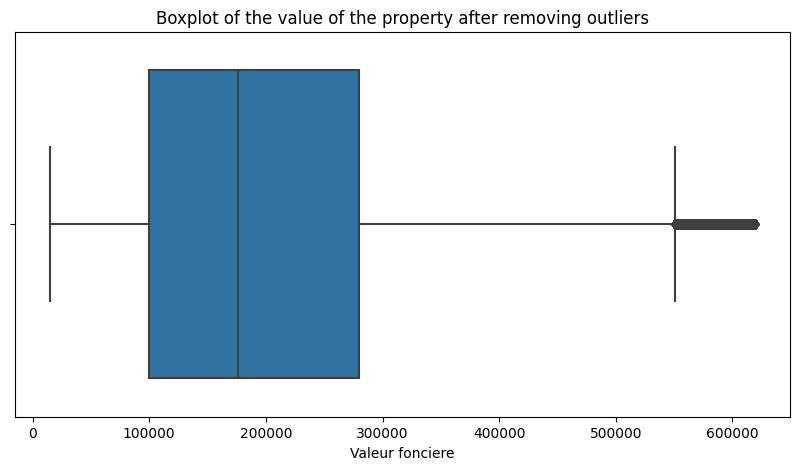

In [70]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Valeur fonciere'])
plt.title('Boxplot of the value of the property after removing outliers')
plt.show()

On regarde maintenant si le marché immobilier a changé sur le cours de l'année

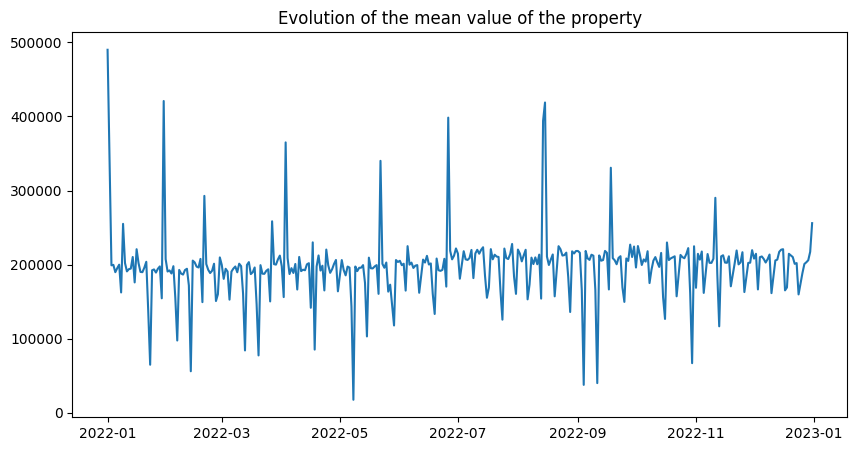

In [71]:
df['Date mutation'] = pd.to_datetime(df['Date mutation'], format='%d/%m/%Y')

plt.figure(figsize=(10, 5))
plt.plot(df.groupby('Date mutation')['Valeur fonciere'].mean())
plt.title('Evolution of the mean value of the property')
plt.show()

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2980467 entries, 0 to 3803884
Data columns (total 19 columns):
 #   Column                     Dtype         
---  ------                     -----         
 0   No disposition             object        
 1   Date mutation              datetime64[ns]
 2   Nature mutation            object        
 3   Valeur fonciere            float64       
 4   No voie                    int32         
 5   Type de voie               object        
 6   Code voie                  object        
 7   Voie                       object        
 8   Code postal                object        
 9   Commune                    object        
 10  Code departement           object        
 11  Code commune               object        
 12  Section                    object        
 13  No plan                    object        
 14  Nombre de lots             int32         
 15  Surface reelle bati        object        
 16  Nombre pieces principales  int32         

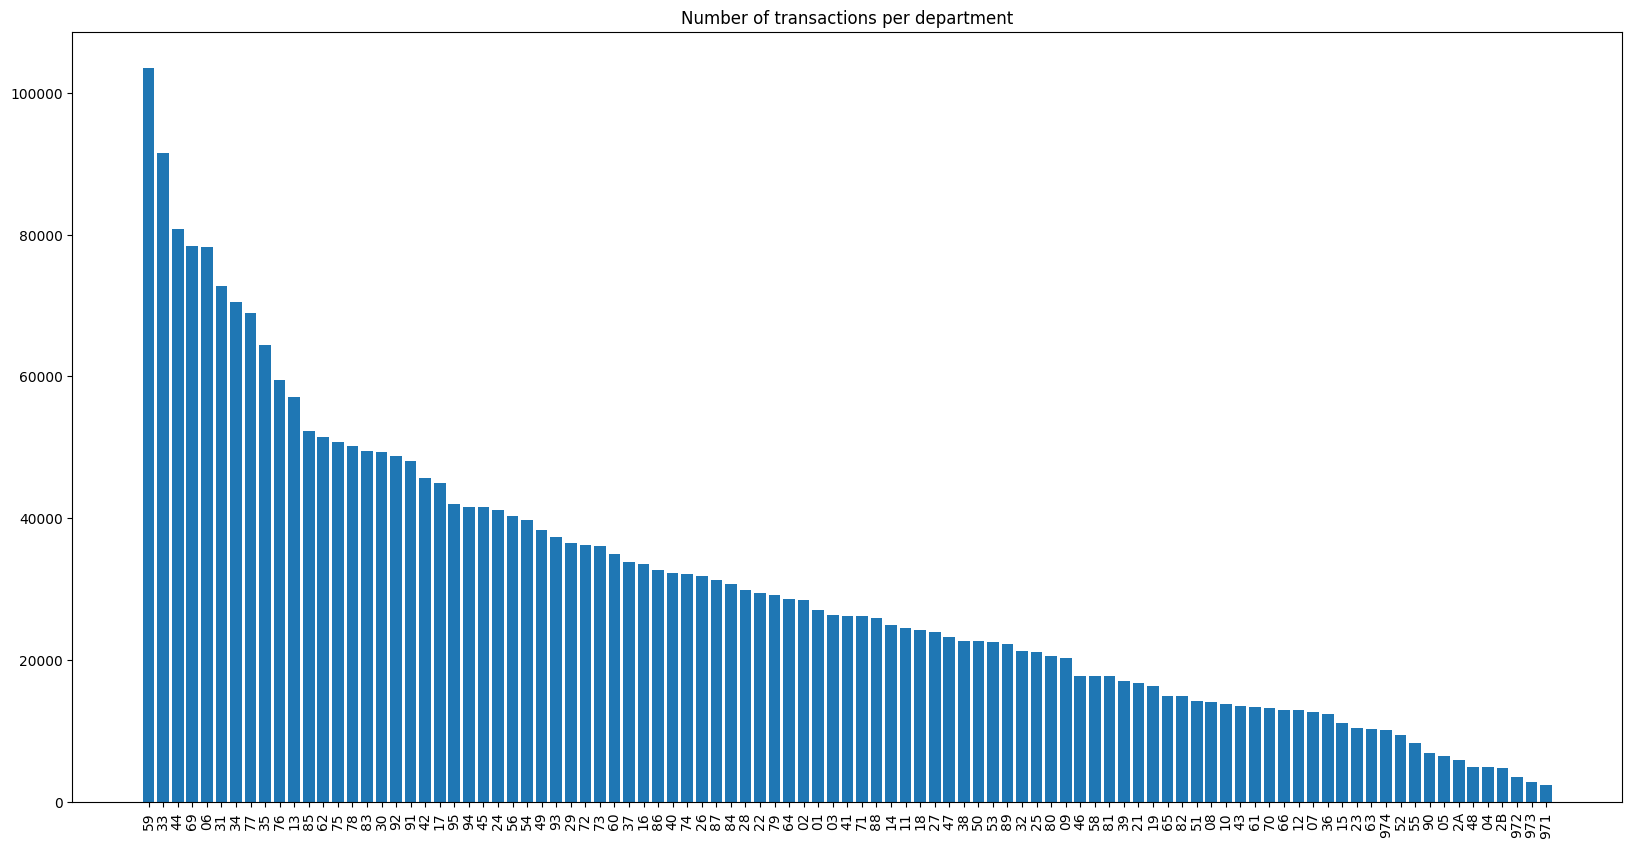

In [73]:
df['Code departement'] = df['Code departement'].astype(str)

plt.figure(figsize=(20, 10))
plt.bar(df['Code departement'].value_counts().index, df['Code departement'].value_counts().values)
plt.xticks(rotation=90)
plt.xticks(fontsize=10)
plt.title('Number of transactions per department')
plt.show()

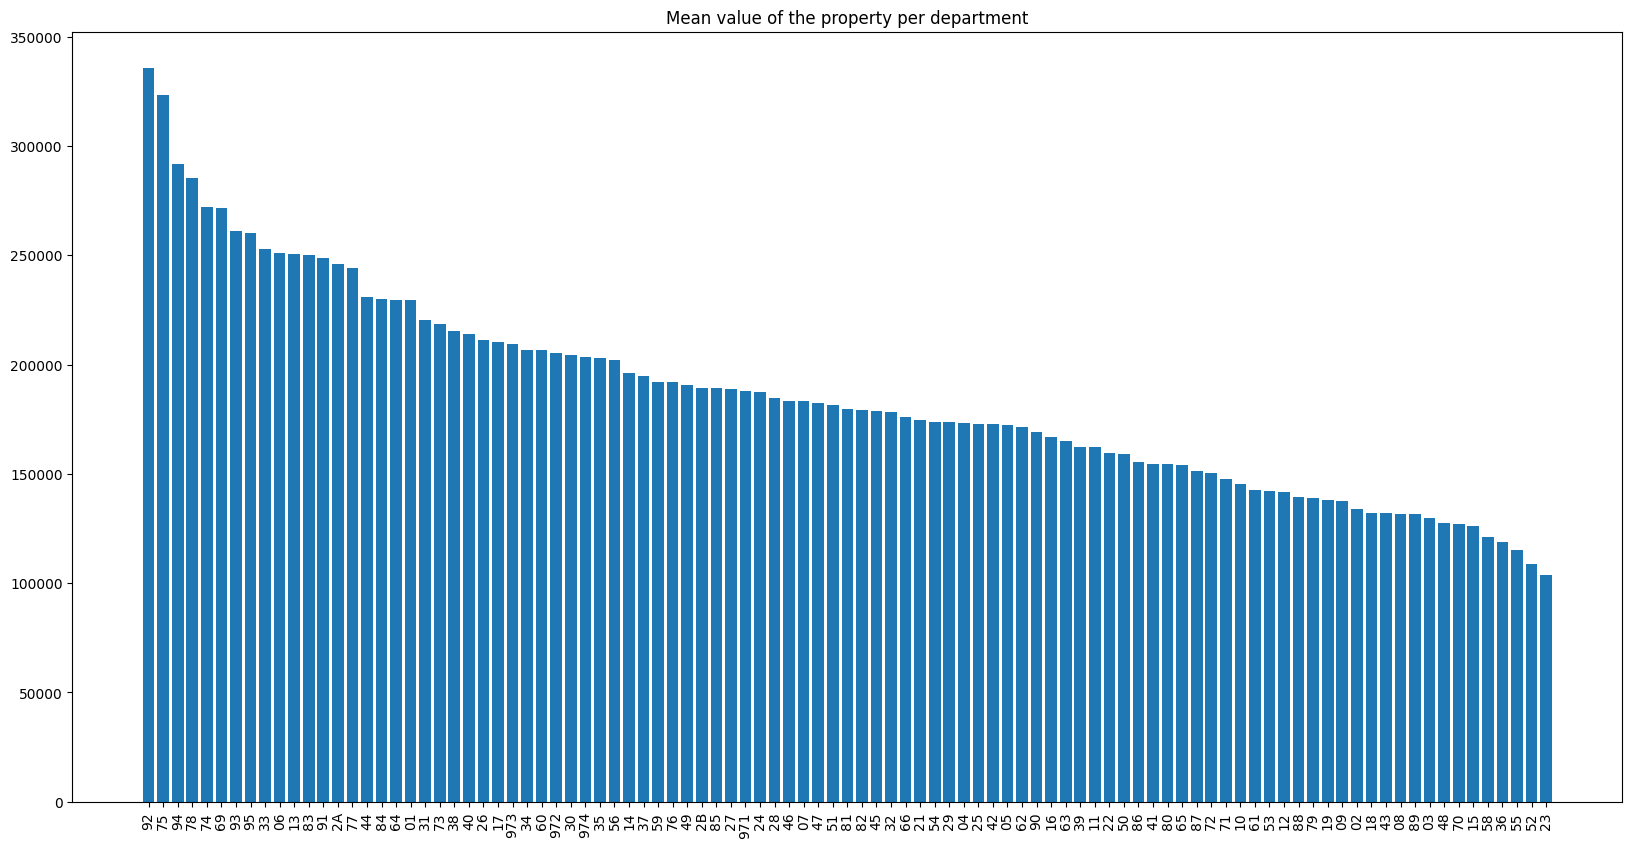

In [74]:
plt.figure(figsize=(20, 10))
plt.bar(df.groupby('Code departement')['Valeur fonciere'].mean().sort_values(ascending=False).index, df.groupby('Code departement')['Valeur fonciere'].mean().sort_values(ascending=False).values)
plt.xticks(rotation=90)
plt.title('Mean value of the property per department')
plt.show()

## Modèles

On garde seulement les départements des Hauts-de-France

In [75]:
df = df[df['Code departement'].isin(['59', '62', '80', '02', '60'])]

In [76]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Type immobilier'] = le.fit_transform(df['Type immobilier'])
df['Type de voie'] = le.fit_transform(df['Type de voie'])
df['Code departement'] = le.fit_transform(df['Code departement'])
df['Code commune'] = le.fit_transform(df['Code commune'])
df['Nature mutation'] = le.fit_transform(df['Nature mutation'])
df['Section'] = le.fit_transform(df['Section'])
df['Commune'] = le.fit_transform(df['Commune'])
df['Voie'] = le.fit_transform(df['Voie'])
df['Code voie'] = le.fit_transform(df['Code voie'])
df['Date mutation'] = le.fit_transform(df['Date mutation'])

df.head()

,No disposition,Date mutation,Nature mutation,Valeur fonciere,No voie,Type de voie,Code voie,Voie,Code postal,Commune,Code departement,Code commune,Section,No plan,Nombre de lots,Surface reelle bati,Nombre pieces principales,Surface terrain,Type immobilier
35701,000001,4,2,150000.0,13,45,2061,29799,2000,1844,0,343,19,89,0,256,0,600,60
35702,000001,4,2,150000.0,13,45,2061,29799,2000,1844,0,343,19,89,0,50,3,600,58
35703,000001,4,2,150000.0,13,45,2061,29799,2000,1844,0,343,19,89,0,90,5,600,58
35704,000001,4,2,150000.0,13,45,2061,29799,2000,1844,0,343,19,89,0,45,3,600,58
35707,000001,3,2,80000.0,9,65,19,5890,2210,1852,0,347,74,480,0,0,0,652,59


In [77]:
from sklearn.model_selection import train_test_split

X = df.drop(['Valeur fonciere'], axis=1)
y = df['Valeur fonciere']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((191063, 18), (191063,), (47766, 18), (47766,))

In [78]:
from sklearn.linear_model import LinearRegression
from scipy.stats import spearmanr

lr = LinearRegression()
lr.fit(X_train, y_train)
print('Linear Regression score: ', lr.score(X_test, y_test))
print('Spearman correlation: ', spearmanr(lr.predict(X_test), y_test))

Linear Regression score:  0.056613575541078265
Spearman correlation:  SignificanceResult(statistic=0.27353887322067827, pvalue=0.0)


In [79]:
def spearmanr_scorer(estimator, X, y):
    return spearmanr(estimator.predict(X), y)[0]

In [88]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

scores = []
alphas = np.linspace(0.1, 10, 20)

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    cv = KFold(n_splits=5, shuffle=True, random_state=42)
    score = cross_val_score(ridge, X_train, y_train, cv=cv, scoring=spearmanr_scorer)
    scores.append(np.mean(score))



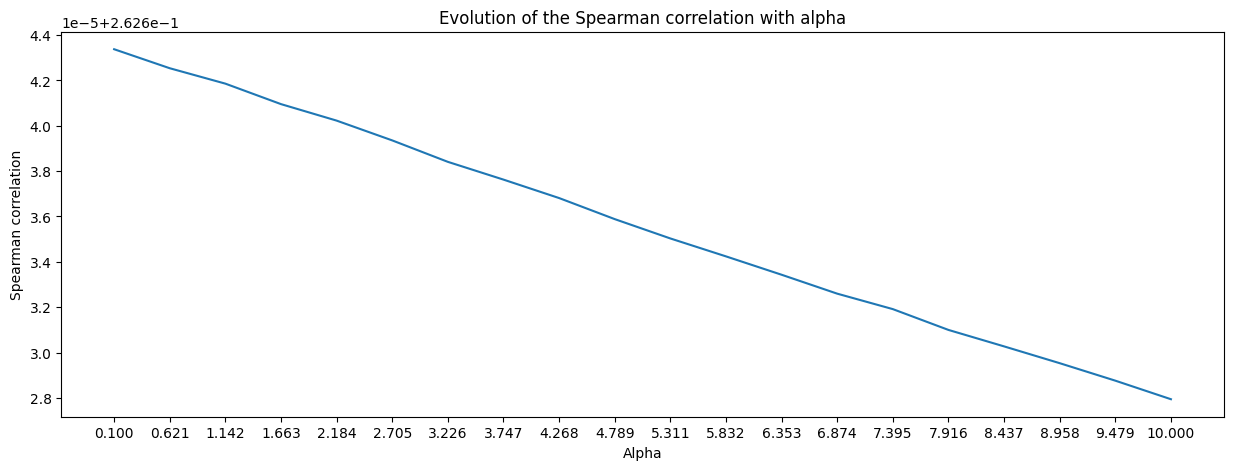

In [90]:
plt.figure(figsize=(15, 5))
plt.plot(alphas, scores)
plt.xlabel('Alpha')
plt.ylabel('Spearman correlation')
plt.xticks(alphas)
plt.title('Evolution of the Spearman correlation with alpha')
plt.show()

In [91]:
best_alpha = alphas[np.argmax(scores)]
print('Best alpha: ', best_alpha)

ridge = Ridge(alpha=best_alpha)
ridge.fit(X_train, y_train)
print('Ridge score: ', ridge.score(X_test, y_test))
print('Spearman correlation: ', spearmanr(ridge.predict(X_test), y_test))

Best alpha:  0.1
Ridge score:  0.05661358214888279
Spearman correlation:  SignificanceResult(statistic=0.2735386740591333, pvalue=0.0)


In [92]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf = RandomForestRegressor()
params = {'n_estimators': [100, 200, 300], 'max_depth': [5, 10, 15], 'min_samples_leaf': [5, 10, 15]}
rf_grid = GridSearchCV(rf, params, scoring=spearmanr_scorer, cv=5, verbose=2)
rf_grid.fit(X_train, y_train)
print('Random Forest score: ', rf_grid.score(X_test, y_test))
print('Spearman correlation: ', spearmanr(rf_grid.predict(X_test), y_test))
print('Best parameters: ', rf_grid.best_params_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END ..max_depth=5, min_samples_leaf=5, n_estimators=100; total time=  49.6s
[CV] END ..max_depth=5, min_samples_leaf=5, n_estimators=100; total time= 1.6min
[CV] END ..max_depth=5, min_samples_leaf=5, n_estimators=100; total time= 1.8min
[CV] END ..max_depth=5, min_samples_leaf=5, n_estimators=100; total time= 1.8min
[CV] END ..max_depth=5, min_samples_leaf=5, n_estimators=100; total time= 1.8min
[CV] END ..max_depth=5, min_samples_leaf=5, n_estimators=200; total time= 3.6min
[CV] END ..max_depth=5, min_samples_leaf=5, n_estimators=200; total time= 3.6min
[CV] END ..max_depth=5, min_samples_leaf=5, n_estimators=200; total time= 2.6min
[CV] END ..max_depth=5, min_samples_leaf=5, n_estimators=200; total time= 2.4min
[CV] END ..max_depth=5, min_samples_leaf=5, n_estimators=200; total time= 2.4min
[CV] END ..max_depth=5, min_samples_leaf=5, n_estimators=300; total time= 3.5min
[CV] END ..max_depth=5, min_samples_leaf=5, n_e

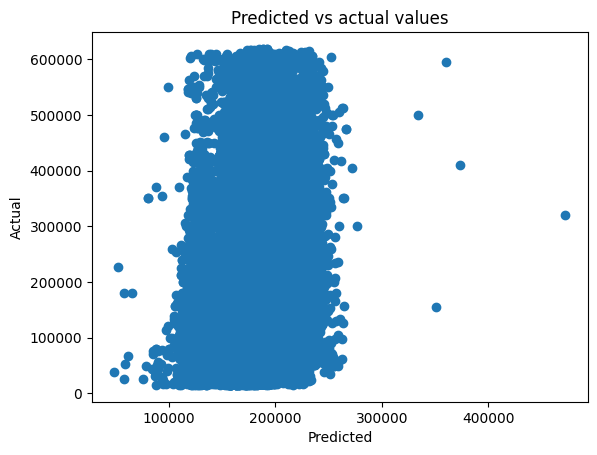

In [93]:
plt.scatter(lr.predict(X_test), y_test)
plt.title('Predicted vs actual values')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
import tensorflow as tf

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
y_train = y_train.astype('float32')
y_test = y_test.astype('float32')

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [ ]:
def spearman(y_true, y_pred):
    return tf.py_function(spearmanr, (y_pred, y_true), tf.float64)

model.compile(optimizer='adam', loss='mse', metrics=[spearman])

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=10000, validation_split=0.2)

Epoch 1/10
191/191 [==============================] - 9s 39ms/step - loss: 23981363200.0000 - spearman: 0.0383 - val_loss: 20009160704.0000 - val_spearman: 0.0991
Epoch 2/10
191/191 [==============================] - 8s 40ms/step - loss: 19773220864.0000 - spearman: 0.1101 - val_loss: 19557625856.0000 - val_spearman: 0.1199
Epoch 3/10
191/191 [==============================] - 7s 39ms/step - loss: 19451815936.0000 - spearman: 0.1214 - val_loss: 19316779008.0000 - val_spearman: 0.1279
Epoch 4/10
191/191 [==============================] - 7s 39ms/step - loss: 19244853248.0000 - spearman: 0.1294 - val_loss: 19105769472.0000 - val_spearman: 0.1358
Epoch 5/10
191/191 [==============================] - 7s 38ms/step - loss: 19044007936.0000 - spearman: 0.1383 - val_loss: 18946269184.0000 - val_spearman: 0.1470
Epoch 6/10
191/191 [==============================] - 8s 41ms/step - loss: 18865772544.0000 - spearman: 0.1481 - val_loss: 18738747392.0000 - val_spearman: 0.1506
Epoch 7/10
191/191 [==

In [ ]:
print('Neural Network score: ', model.evaluate(X_test, y_test))

 9561/18628 [==============>...............] - ETA: 59s - loss: 17911660544.0000 - spearman: 0.2010

10490/18628 [===============>..............] - ETA: 54s - loss: 17905287168.0000 - spearman: 0.2017

18628/18628 [==============================] - 27s 1ms/step


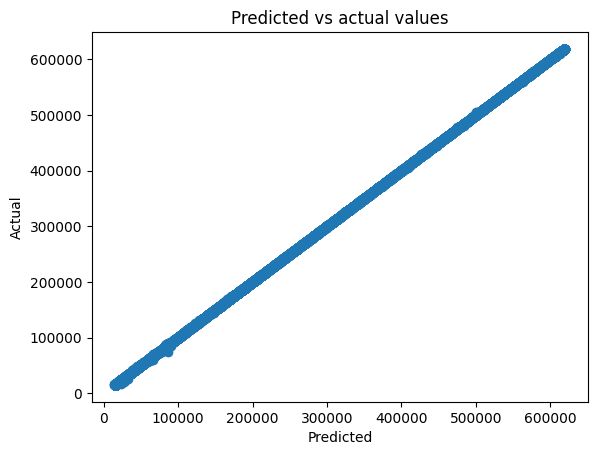

In [ ]:
plt.scatter(model.predict(X_test), y_test)
plt.title('Predicted vs actual values')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#